In [125]:
import os
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
# rdir = "results-wd.5e-3/"
# rdir="results-wd.1e-4"
# rdir="results --wd 5e-3 --reg_multiscale"
rdir="results --wd 5e-3"

datasets = [d for d in os.listdir(f"../{rdir}") if not d.startswith(".")]

results = []
curves = []
for dset in datasets:
    dirs =  [d for d in os.listdir(f"../{rdir}/{dset}") if not d.startswith(".")]

    for dir in dirs:
        runs = [d for d in os.listdir(f"../{rdir}/{dset}/{dir}") if not d.startswith(".")] 
        for seed in runs:
            exp_dir = f"../{rdir}/{dset}/{dir}/{seed}"
            with open(f"{exp_dir}/metrics.yaml", 'r') as io:
                metrics = yaml.safe_load(io)

            with open(f"{exp_dir}/config.yaml", 'r') as io:
                cfg = yaml.safe_load(io)
            metrics['seed'] = int(seed)
            metrics['combo'] = int(cfg['combo_reg'])
            metrics['var'] = "Yes" if int(cfg['var_reg']) else "No"
            metrics['ratio'] = "Yes" if int(cfg['ratio_reg']) else "No"
            metrics['dataset'] = dset
            results.append(metrics)

            curve = pd.read_csv(f"{exp_dir}/curve.csv")
            curve['seed'] = int(seed)
            curve['var'] = int(cfg['var_reg'])
            curve['ratio'] = int(cfg['ratio_reg'])
            curve['dataset'] = dset
            curves.append(curve)

results = pd.DataFrame(results)
curves = pd.concat(curves)

In [127]:
results.groupby(['dataset', 'var', 'ratio']).mean().reset_index()

,dataset,var,ratio,@0.1,@0.5,curve,density_negll,last_saved_epoch,ratio_reg_loss,seed,total_loss,var_reg_loss,combo
0,sim-N,No,No,0.048822,0.181868,0.126164,1.162820,9999.0,NaN,12.0,1.162820,NaN,0.0
1,sim-N,No,Yes,0.052159,0.199185,0.134139,1.133012,9999.0,0.056737,12.0,1.189749,NaN,0.0
2,sim-N,Yes,No,0.078306,0.309223,0.240526,10.302366,9999.0,NaN,12.0,12.830078,2.527712,0.0
3,sim-N,Yes,Yes,0.065896,0.320698,0.231798,10.899794,9999.0,0.106455,12.0,13.404298,2.398049,1.0


In [128]:
results.groupby(['dataset', 'var', 'ratio']).std().reset_index()

,dataset,var,ratio,@0.1,@0.5,curve,density_negll,last_saved_epoch,ratio_reg_loss,seed,total_loss,var_reg_loss,combo
0,sim-N,No,No,0.032079,0.105417,0.047778,0.039343,0.0,NaN,7.359801,0.039343,NaN,0.0
1,sim-N,No,Yes,0.030637,0.112197,0.047370,0.042665,0.0,0.000699,7.359801,0.042928,NaN,0.0
2,sim-N,Yes,No,0.041532,0.118365,0.073598,1.205317,0.0,NaN,7.359801,1.032058,0.549930,0.0
3,sim-N,Yes,Yes,0.043844,0.128956,0.085692,1.368552,0.0,0.006636,7.359801,1.135404,0.625011,0.0


Plot curves

In [129]:
# curves_means = curves.groupby(['dataset', 'var', 'ratio', 'delta']).mean().reset_index().set_index(['dataset', 'var', 'ratio'])
# curves_stdevs = curves.groupby(['dataset', 'var', 'ratio', 'delta']).std().reset_index().set_index(['dataset', 'var', 'ratio'])
# # D_var0_ratio0 = curves[curves.combo == 0]
# curves_means

========== sim-N =========


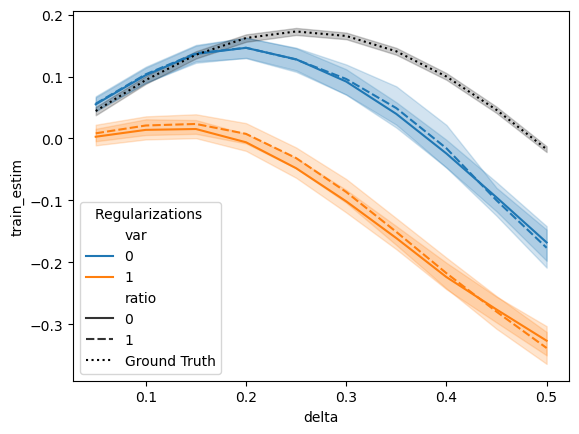

In [131]:
for dset in datasets:
    print(f"========== {dset} =========")
    part = "test"
    D = curves[curves.dataset == dset]
    truth = D[(D.var == 0) & (D.ratio == 0)][["delta", f"{part}_truth"]]
    sns.lineplot(x="delta", y="train_estim", hue="var", style="ratio", data=D, legend=True)
    sns.lineplot(x="delta", y=f"{part}_truth", label="Ground Truth", c="black", ls=":", data=D, legend=True)
    plt.legend(title='Regularizations ')
    plt.show()